In [2]:
#import libraries
import pandas as pd #analysis
import matplotlib.pyplot as plt #visualisation

In [7]:
pokemon_df = pd.read_csv("/content/Pokemon.csv")

pokemon_df.head(n=10) #top 10 rows
pokemon_df.sample(10) #random rows

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
443,398,Staraptor,Normal,Flying,485,85,120,70,50,60,100,4,False
543,486,Regigigas,Normal,NaN,670,110,160,110,80,110,100,4,True
623,562,Yamask,Ghost,NaN,303,38,30,85,55,65,30,5,False
312,288,Vigoroth,Normal,NaN,440,80,80,80,55,55,90,3,False
538,481,Mesprit,Psychic,NaN,580,80,105,105,105,105,80,4,True
73,67,Machoke,Fighting,NaN,405,80,100,70,50,60,45,1,False
465,418,Buizel,Water,NaN,330,55,65,35,60,30,85,4,False
140,130,Gyarados,Water,Flying,540,95,125,79,60,100,81,1,False
622,561,Sigilyph,Psychic,Flying,490,72,58,80,103,80,97,5,False
112,104,Cubone,Ground,NaN,320,50,50,95,40,50,35,1,False


In [9]:
#number of rows and columns
rows, columns = pokemon_df.shape #(800, 13)
print(f"Number of rows is {rows}, number of columns is {columns}")

Number of rows is 800, number of columns is 13


In [17]:
#unique pokemon names
unique_names = pokemon_df["Name"].unique()
print(f"Number of unique pokemon names is {len(unique_names)}")

number_of_unique_names = pokemon_df["Name"].nunique()
print(number_of_unique_names)

Number of unique pokemon names is 800
800


In [26]:
#how many have attack greater than 100
attack_greater_than_100 = pokemon_df[pokemon_df["Attack"] > 100]
print(len(attack_greater_than_100)) #170

#how many have defense greater than 100
defense_greater_than_100 = pokemon_df[pokemon_df["Defense"] > 100]
print(len(defense_greater_than_100)) #18

#double filtering
#how many pokemons have both attack greater than 100 and defense greater than 100
attack_greater_than_100_and_defense_greater_than_100 = pokemon_df[(pokemon_df["Attack"] > 100) & (pokemon_df["Defense"] > 100)]
print(f"Number of pokemon with both attack and defense greater than 100: {len(attack_greater_than_100_and_defense_greater_than_100})") #48

170
123
48


In [34]:
#value counts

#create a Df that counts the number of pokemons in each group for type 1
type1_pokemons = pokemon_df["Type 1"].value_counts().reset_index()
print(type1_pokemons)

      Type 1  count
0      Water    112
1     Normal     98
2      Grass     70
3        Bug     69
4    Psychic     57
5       Fire     52
6   Electric     44
7       Rock     44
8     Dragon     32
9     Ground     32
10     Ghost     32
11      Dark     31
12    Poison     28
13     Steel     27
14  Fighting     27
15       Ice     24
16     Fairy     17
17    Flying      4


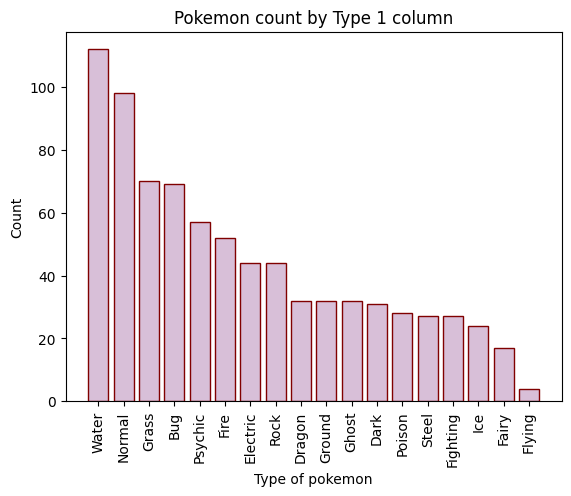

In [48]:
#bar charts

plt.bar(type_1_pokemons['Type 1'], type_1_pokemons['count'], color='thistle', edgecolor='maroon')
plt.xlabel("Type of pokemon")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.title("Pokemon count by Type 1 column")
plt.show()

In [56]:
#pokemon with the biggest attack
max_attack_value = pokemon_df["Attack"].max()  #the highest value of the attack
max_attack_index = pokemon_df["Attack"].idxmax()  #index of the highest attack

#get the pokemon name with the highest attack
pokemon_with_max_attack = pokemon_df["Name"].iloc[max_attack_index]

print(f"The pokemon with the highest attack ({max_attack_value}) is {pokemon_with_max_attack}.")


The pokemon with the highest attack (190) is MewtwoMega Mewtwo X.


In [69]:
#adding calculated column
pokemon_df["Attack_Defense"] = pokemon_df["Attack"] + pokemon_df["Defense"]
pokemon_df.head(5)

#moving this column to the 9th position
attack_defense_col = pokemon_df.pop('Attack_Defense')

#insert the 'Attack_Defense' column at the 9th position (index 8, because index starts at 0)
pokemon_df.insert(8, 'Attack_Defense', attack_defense_col)

pokemon_df.head()  #display the first few rows of the DataF


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Attack_Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,My unique column,Attack above average
0,1,Bulbasaur,Grass,Poison,98,45,49,49,98,65,65,45,1,False,Pokemon,False
1,2,Ivysaur,Grass,Poison,125,60,62,63,125,80,80,60,1,False,Pokemon,False
2,3,Venusaur,Grass,Poison,165,80,82,83,165,100,100,80,1,False,Pokemon,True
3,3,VenusaurMega Venusaur,Grass,Poison,223,80,100,123,223,122,120,80,1,False,Pokemon,True
4,4,Charmander,Fire,NaN,95,39,52,43,95,60,50,65,1,False,Pokemon,False


In [87]:
#adding a column
pokemon_df["My unique column"] = "Pokemon"

In [72]:
#adding calculated column
pokemon_df["Attack_Defense"] = pokemon_df["Attack"] + pokemon_df["Defense"]
pokemon_df.head(5)

#moving this column
pokemon_df.insert(9, 'Attack_Defense', pokemon_df.pop('Attack_Defense'))
pokemon_df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Attack_Defense,Sp. Def,Speed,Generation,Legendary,My unique column,Attack above average
0,1,Bulbasaur,Grass,Poison,98,45,49,49,65,98,65,45,1,False,Pokemon,False
1,2,Ivysaur,Grass,Poison,125,60,62,63,80,125,80,60,1,False,Pokemon,False
2,3,Venusaur,Grass,Poison,165,80,82,83,100,165,100,80,1,False,Pokemon,True
3,3,VenusaurMega Venusaur,Grass,Poison,223,80,100,123,122,223,120,80,1,False,Pokemon,True
4,4,Charmander,Fire,NaN,95,39,52,43,60,95,50,65,1,False,Pokemon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,250,50,100,150,100,250,150,50,6,True,Pokemon,True
796,719,DiancieMega Diancie,Rock,Fairy,270,50,160,110,160,270,110,110,6,True,Pokemon,True
797,720,HoopaHoopa Confined,Psychic,Ghost,170,80,110,60,150,170,130,70,6,True,Pokemon,True
798,720,HoopaHoopa Unbound,Psychic,Dark,220,80,160,60,170,220,130,80,6,True,Pokemon,True


In [73]:
#math
pokemon_df["Attack"].sum() #63201
pokemon_df["Attack"].min() #5
pokemon_df["Attack"].max() #190
pokemon_df["Attack"].mean() #70.6 is the average

79.00125

In [74]:
#if the attack is above or below the average value of this column
pokemon_df["Attack"] > pokemon_df["Attack"].mean()

pokemon_df["Attack above average"] = pokemon_df["Attack"] > pokemon_df["Attack"].mean()
pokemon_df.head(5)

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Attack_Defense,Sp. Def,Speed,Generation,Legendary,My unique column,Attack above average
0,1,Bulbasaur,Grass,Poison,98,45,49,49,65,98,65,45,1,False,Pokemon,False
1,2,Ivysaur,Grass,Poison,125,60,62,63,80,125,80,60,1,False,Pokemon,False
2,3,Venusaur,Grass,Poison,165,80,82,83,100,165,100,80,1,False,Pokemon,True
3,3,VenusaurMega Venusaur,Grass,Poison,223,80,100,123,122,223,120,80,1,False,Pokemon,True
4,4,Charmander,Fire,NaN,95,39,52,43,60,95,50,65,1,False,Pokemon,False


In [88]:
#dropping a column
pokemon_df.shape #(800, 16)
pokemon_df = pokemon_df.drop(columns=["My unique column"])
pokemon_df.shape #(800, 15)

(800, 15)

**HISTOGRAM**

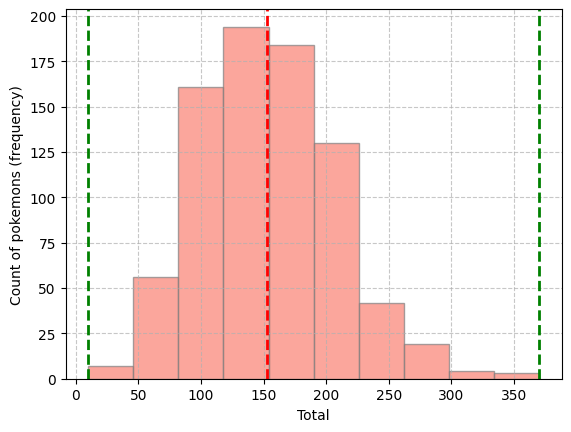

In [104]:
#analyze total for each pokemon
plt.hist(pokemon_df["Total"], color = "salmon", edgecolor = "gray", alpha = 0.7) #alpha = transparency #default is 10 bins
plt.xlabel("Total")
plt.ylabel("Count of pokemons (frequency)")

#average value line
plt.axvline(pokemon_df["Total"].mean(), color = "red", linestyle = "dashed", linewidth = 2)

#min and max values lines
plt.axvline(pokemon_df["Total"].min(), color = "green", linestyle = "dashed", linewidth = 2)
plt.axvline(pokemon_df["Total"].max(), color = "green", linestyle = "dashed", linewidth = 2)

plt.grid(linestyle = "--", alpha = 0.7)
plt.show()

Histogram counts: [281. 485.  34.]
Bin edges: [ 10. 130. 250. 370.]


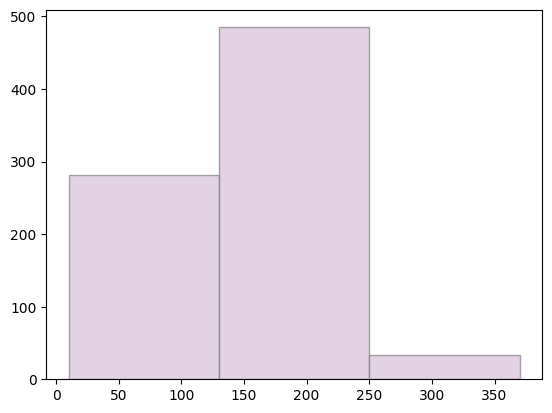

In [109]:
#plot the histogram
hist_values, bin_edges, _ = plt.hist(pokemon_df["Total"], bins=3, color="thistle", edgecolor="gray", alpha=0.7)

#print histogram counts and bin edges
print("Histogram counts:", hist_values)
print("Bin edges:", bin_edges)

#show the plot
plt.show()


In [115]:
#value_counts calculation

pokemon_df["Total"].value_counts(bins = [179, 379, 579, 781])

(pokemon_df["Total"]>579).sum()

0

array([<Axes: title={'center': 'False'}>,
       <Axes: title={'center': 'True'}>], dtype=object)

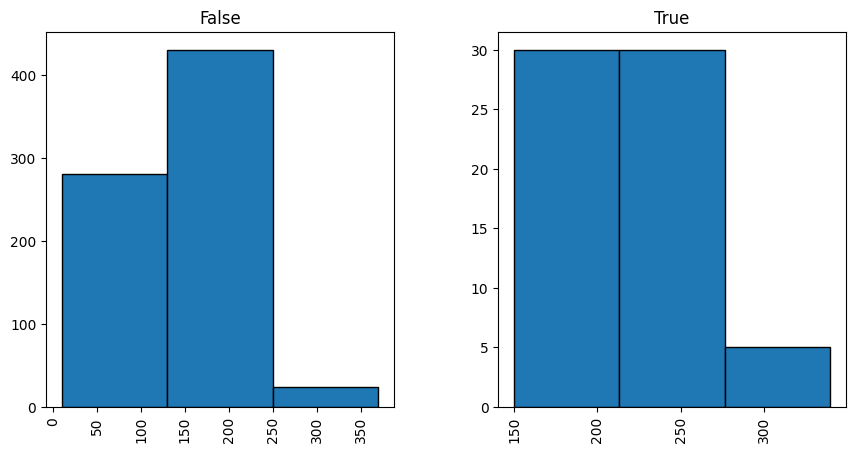

In [122]:
#Plot histograms by the 'Legendary' column
pokemon_df.hist(column="Total", by="Legendary", bins=3, edgecolor="black", figsize=(10, 5))


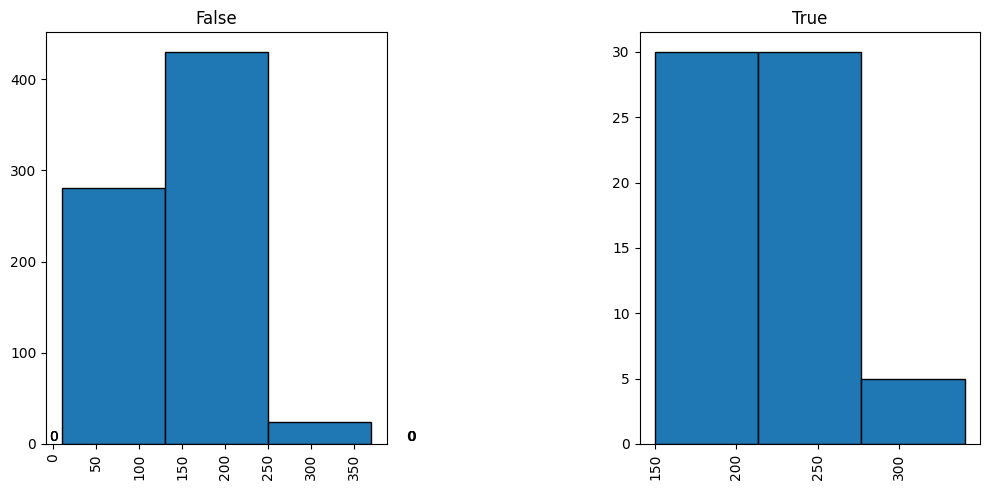

In [120]:
# Plot histograms by the 'Legendary' column
axes = pokemon_df.hist(column="Total", by="Legendary", bins=3, edgecolor="black", figsize=(10, 5))

# Annotate the histogram bins
for ax in axes.flatten():  # If there are subplots, this handles them
    n, bins = np.histogram(pokemon_df[pokemon_df["Legendary"] == ax.get_title()]["Total"], bins=3)
    for i in range(len(bins) - 1):
        ax.text(bins[i] + (bins[i+1] - bins[i]) / 2, n[i], int(n[i]), ha='center', va='bottom')

    # Calculate and draw the average line
    avg = pokemon_df[pokemon_df["Legendary"] == ax.get_title()]["Total"].mean()
    ax.axvline(avg, color='maroon', linestyle='dashed', linewidth=1)
    ax.text(avg, ax.get_ylim()[1] * 0.9, f'Avg: {avg:.2f}', color='maroon', ha='center', rotation=90)

plt.tight_layout()  # Adjust layout for better spacing
plt.show()


**To complete the tasks use 'pokemon.csv' dataset**
Answer the following questions:
How many Pokémons are with 'Type 1' == Water as a % of total?
What is the maximum 'Speed' value? What is the minimum 'Speed' value? What is the difference between max and min 'Speed'?
Filter the DataFrame to include only the Pokémon with 'Speed' >= 80. How many Pokémon meet this criterion? Display this DataFrame using your preferred visualization method.
(DIFFICULT) Find Pokémon with the longest name (excluding spaces)? What is this pokemons name?

In [128]:
#How many Pokémons are with 'Type 1' == Water as a % of total?
water_pokemons = pokemon_df[pokemon_df["Type 1"] == "Water"]
percentage_water = len(water_pokemons) / len(pokemon_df) * 100
print(f"Percentage of pokemon with 'Type 1' == Water is: {percentage_water} %.")

Percentage of pokemon with 'Type 1' == Water is: 14.000000000000002 %.


In [141]:
#What is the maximum 'Speed' value? What is the minimum 'Speed' value?
speed_pokemons = pokemon_df["Speed"]
#print(speed_pokemons.head(10))
max_speed = speed_pokemons.max()
min_speed = speed_pokemons.min()
print(f"Maximum 'Speed' value: {max_speed}.")
print(f"Minimum 'Speed' value: {min_speed}.")

#What is the difference between max and min 'Speed'?
diff_speeds = max_speed - min_speed
print(f"Difference between max and min 'Speed': {diff_speeds}.")

#Filter the DataFrame to include only the Pokémon with 'Speed' >= 80.
speed_greater_than_80 = pokemon_df[pokemon_df["Speed"] >= 80]

#How many Pokémon meet this criterion?
print(f"Number of Pokémon with speed not less than 80 is: {len(speed_greater_than_80)}.")

Maximum 'Speed' value: 180.
Minimum 'Speed' value: 5.
Difference between max and min 'Speed': 175.
Number of Pokémon with speed not less than 80 is: 296


Text(0.5, 1.0, 'Speed greater than 80')

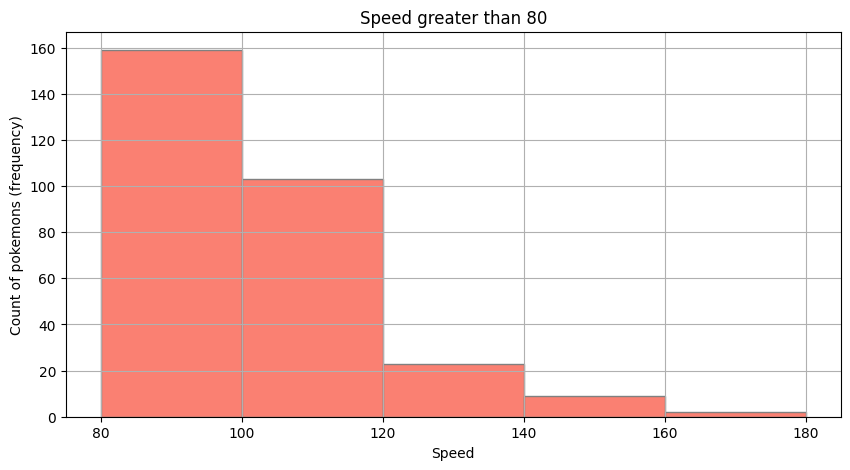

In [146]:
#Display this DataFrame using your preferred visualization method.
speed_greater_than_80.head(10)
axes = speed_greater_than_80.hist(column="Speed", bins=5, color = "salmon" , edgecolor="gray", figsize=(10, 5))
plt.xlabel("Speed")
plt.ylabel("Count of pokemons (frequency)")
plt.title("Speed greater than 80")
